In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
csv_path = "../data/processed/h358-2015.csv"

In [3]:
df = pd.read_csv(csv_path, index_col=0)
print(df.shape)
df.head()

(22498, 13)


,POWER_5,POWER_6,CONTACT_8,CONTACT_9,POWER_10,POWER_12,OCCUPANCY_14,ILLUMINANCE_15,TEMPERATURE_16,POWER_17,TEMPERATURE_18,POWER_22,ILLUMINANCE_23
2015-02-10 12:30:00,0.0,16.0,0.500000,0.0,12.0,20.000000,1.0,102.741818,34.665,7.000000,19.76,0.0,72.0
2015-02-10 13:00:00,0.0,16.0,0.666667,0.0,12.0,0.000000,1.0,89.760000,34.200,35.631579,19.61,0.0,68.0
2015-02-10 15:30:00,0.0,16.0,0.000000,0.0,12.0,26.460317,1.0,33.660000,32.705,34.809524,20.16,0.0,42.0
2015-02-10 16:00:00,0.0,16.0,0.500000,0.0,12.0,23.250000,0.0,21.420000,33.100,34.214286,20.24,0.0,36.0
2015-02-10 16:30:00,0.0,16.0,0.500000,0.0,12.0,0.000000,1.0,43.656000,33.490,33.913043,20.08,0.0,64.8


In [4]:
df.describe()

,POWER_5,POWER_6,CONTACT_8,CONTACT_9,POWER_10,POWER_12,OCCUPANCY_14,ILLUMINANCE_15,TEMPERATURE_16,POWER_17,TEMPERATURE_18,POWER_22,ILLUMINANCE_23
count,22498.000000,22498.000000,22498.000000,22498.000000,22498.000000,2.249800e+04,22498.000000,22498.000000,22498.000000,22498.000000,22498.000000,2.249800e+04,22498.000000
mean,16.696981,111.486609,0.131958,0.116099,24.371912,5.061273e+01,0.245088,50.457677,24.852312,27.907712,22.698455,1.089554e+02,58.310950
std,212.416635,1519.019399,0.275327,0.313287,21.210422,7.072725e+03,0.430149,92.608712,4.163431,203.268614,3.808613,1.409034e+04,81.772519
min,0.000000,15.000000,0.000000,0.000000,3.375000,0.000000e+00,0.000000,0.000000,13.800000,0.000000,13.880000,0.000000e+00,24.000000
25%,0.000000,44.000000,0.000000,0.000000,13.000000,0.000000e+00,0.000000,0.000000,21.800000,0.000000,19.840000,0.000000e+00,24.000000
50%,0.000000,68.000000,0.000000,0.000000,16.000000,0.000000e+00,0.000000,6.120000,24.310000,0.000000,22.120000,0.000000e+00,30.000000
75%,18.000000,95.022101,0.000000,0.000000,28.000000,0.000000e+00,0.000000,64.181538,27.760000,0.000000,25.880000,0.000000e+00,60.000000
max,22817.000000,226758.702703,1.000000,1.000000,1552.840909,1.060864e+06,1.000000,520.200000,39.765000,1917.000000,33.250000,2.097152e+06,1020.000000


Target column (occupancy)

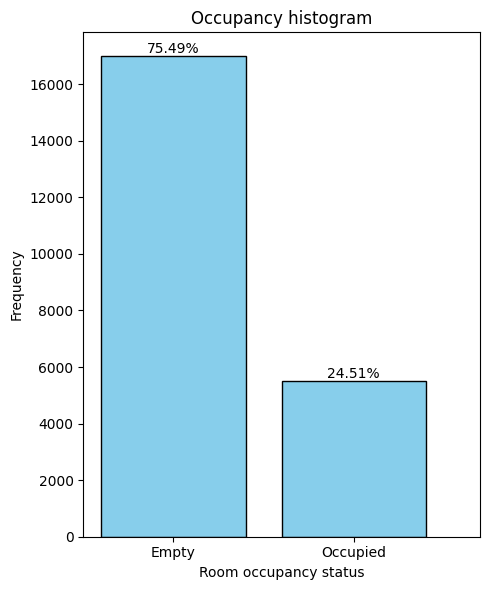

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))

# Plot histogram of target variable
plt.hist(df["OCCUPANCY_14"], bins=2, color='skyblue', edgecolor='black', width=0.4)
plt.xlabel("Room occupancy status")
plt.ylabel("Frequency")
plt.title("Occupancy histogram")

# Calculate percentages
total_count = len(df["OCCUPANCY_14"])
counts = df["OCCUPANCY_14"].value_counts()
percentages = [f'{count / total_count * 100:.2f}%' for count in counts]

# Add percentages on top of the bars
position_offeset = [0.2, -0.3]  # Offset for text position
for i, count in enumerate(counts):
    plt.text(i+position_offeset[i], count, percentages[i], ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=[0.2, 0.7], labels=['Empty', 'Occupied']) 
plt.tight_layout()
plt.show()


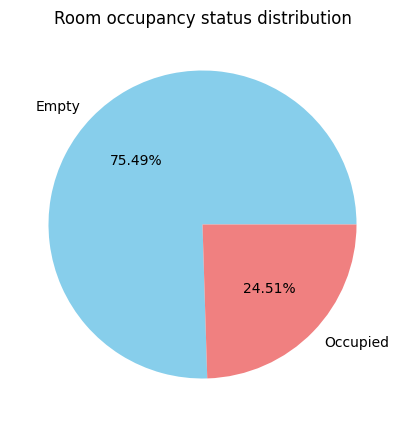

In [6]:
# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=['Empty', 'Occupied'], autopct='%1.2f%%', colors=['skyblue', 'lightcoral'])
plt.title("Room occupancy status distribution")
plt.show()


Predictive features

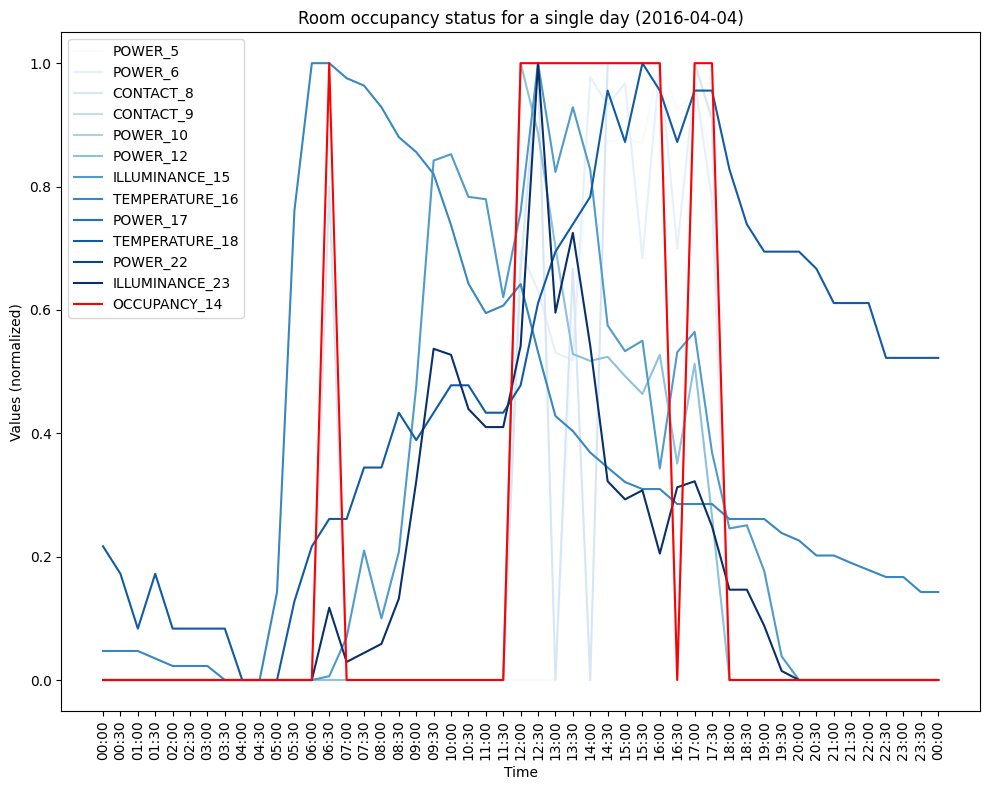

In [7]:
# plotting OCCUPANCY_14 vs other features for a single day

plt.figure(figsize=(10, 8))
day_size = 48
start_date = "2016-04-04 00:00:00"
end_date = str(pd.to_datetime(start_date) + pd.Timedelta(days=1))

colors = plt.cm.Blues(np.linspace(0, 1, 13))
for i, feature in enumerate(df.columns):
    if feature == "OCCUPANCY_14":
        continue
    values = df[start_date:end_date][feature]
    values = (values - values.min()) / (values.max() - values.min())
    plt.plot(values, label=feature, color=colors[i])
plt.plot(df[start_date:end_date]["OCCUPANCY_14"], label="OCCUPANCY_14", color='red', )

plt.xlabel("Time")
plt.ylabel("Values (normalized)")
plt.title(f"Room occupancy status for a single day ({start_date.split(' ')[0]})")
plt.xticks(rotation=90)

# modify xticks to show only hours
actual_ticks = df[start_date:end_date].index
hours = [':'.join(tick.split(" ")[1].split(":")[:-1]) for tick in actual_ticks]
plt.xticks(ticks=range(0, len(hours), 1), labels=hours)

plt.legend()
plt.tight_layout()
plt.show()

OCCUPANCY_14      1.000000
CONTACT_8         0.831453
CONTACT_9         0.535548
POWER_10          0.509731
POWER_17          0.226715
ILLUMINANCE_15    0.225026
TEMPERATURE_16    0.194557
ILLUMINANCE_23    0.172064
TEMPERATURE_18    0.135345
POWER_5           0.054824
POWER_6           0.021335
POWER_12          0.012473
POWER_22         -0.001844
Name: OCCUPANCY_14, dtype: float64


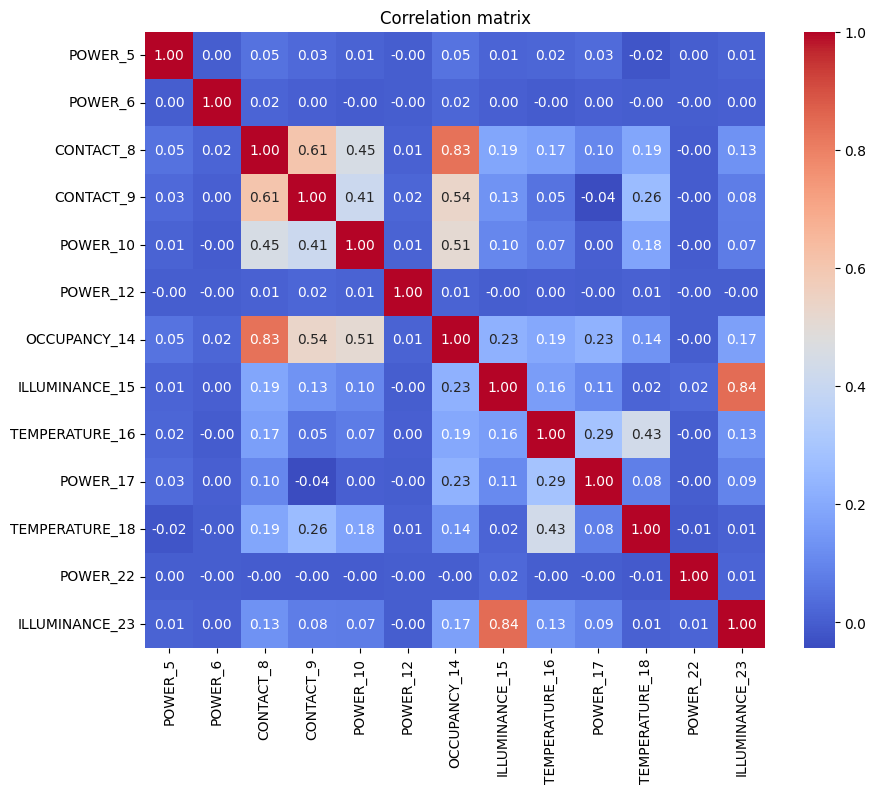

In [8]:
# feature correlation with target variable
corr = df.corr()
print(corr["OCCUPANCY_14"].sort_values(ascending=False))

# Plot correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()



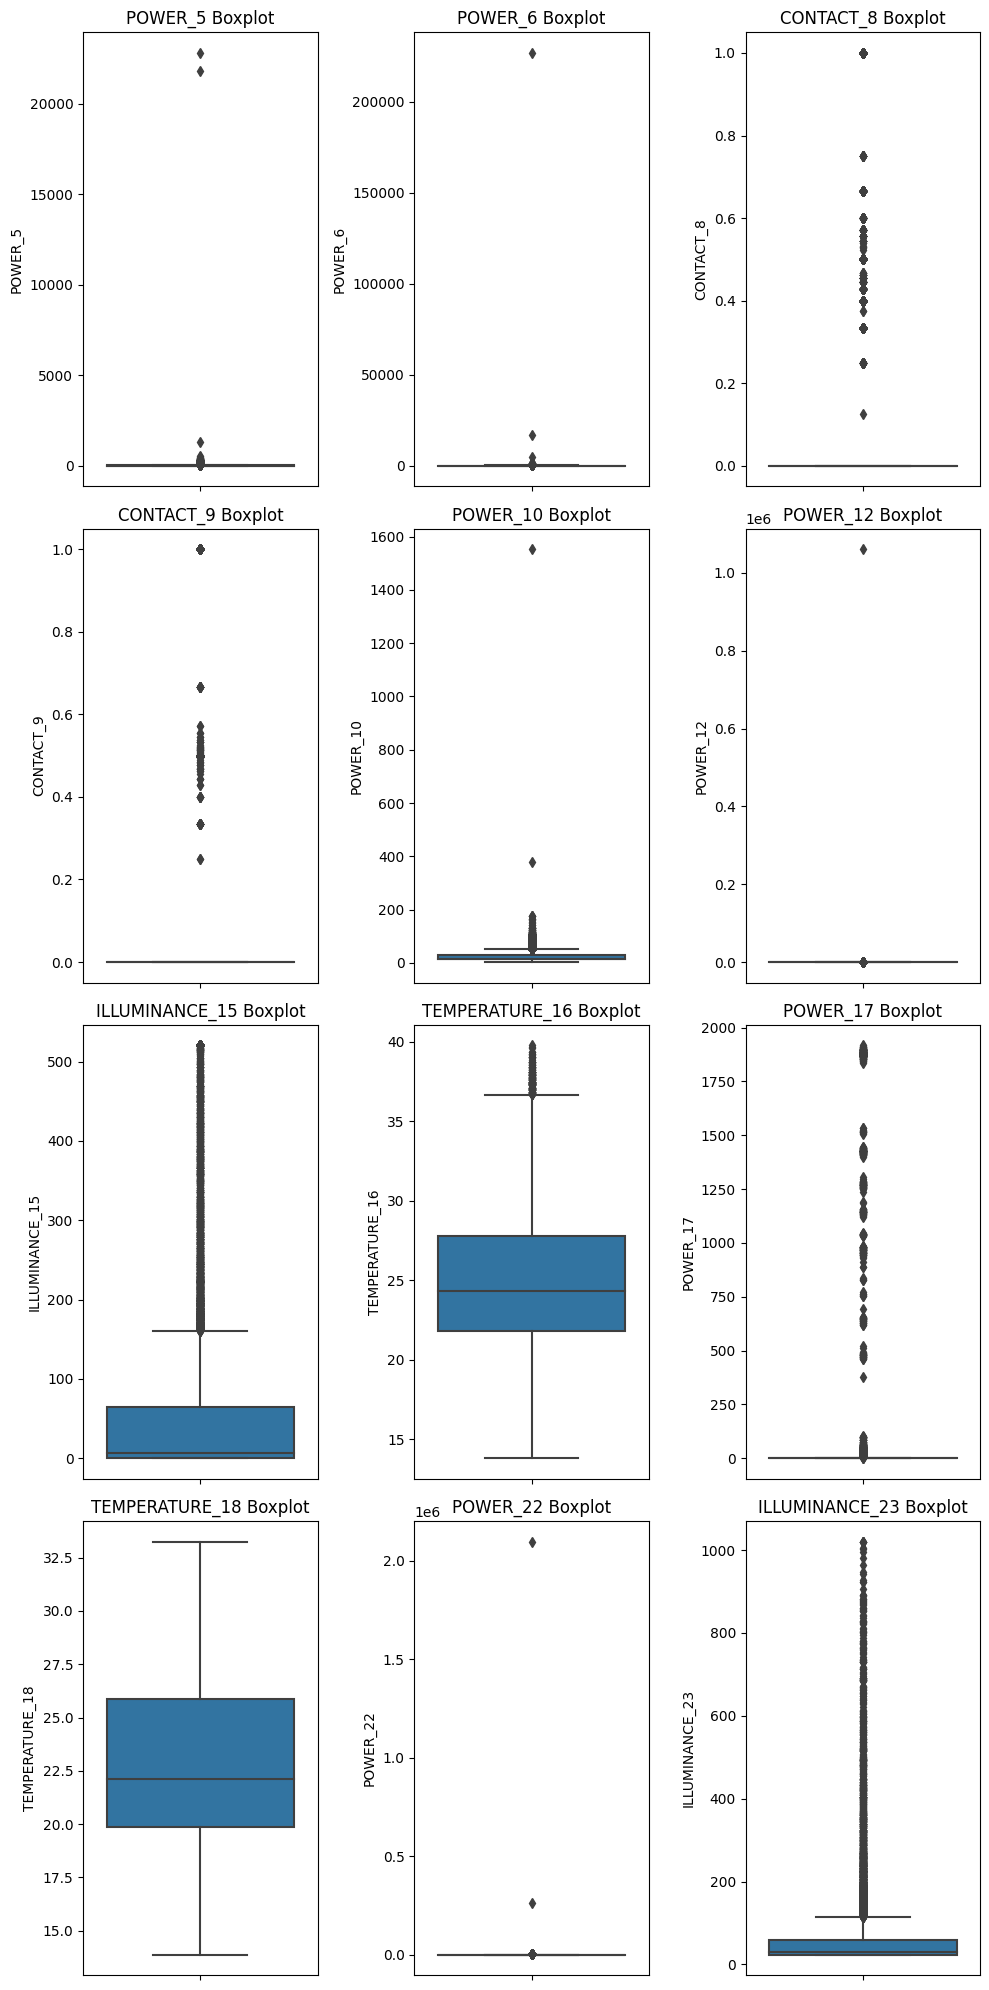

In [9]:
# boxplots for all features
plt.figure(figsize=(10, 20))
i = 0
for col in df.columns:
    if col == "OCCUPANCY_14":
        continue
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=col, data=df)
    plt.title(f"{col} Boxplot")
    i += 1
plt.tight_layout()

### PCA Analysis

In [10]:
from sklearn.decomposition import PCA


def perform_pca(data, n_components):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    Args:
        data (array-like): The input data to perform PCA on.
        n_components (int): The number of components to keep.

    Returns:
        array-like: Transformed data after PCA.
    """
    if not isinstance(n_components, int) or n_components <= 0:
        raise ValueError("n_components must be a positive integer.")

    pca = PCA(n_components=n_components)
    pca.fit(data)
    return pca.transform(data)



> PCA eigenvectors (components):
[[ 1.41272450e-05 -1.66121193e-05 -4.27173426e-08 -5.40289593e-08
  -6.54148500e-06 -2.27561891e-05  1.50634831e-04 -5.37835171e-07
  -1.39353068e-05 -1.91314783e-06  9.99999984e-01  8.44179123e-05]
 [-1.48386972e-05 -4.18180187e-05  2.81072840e-07  8.55825132e-07
   3.99961082e-05  9.99999997e-01 -1.00975924e-05  2.32126866e-06
  -2.16626721e-05  4.32461818e-06  2.27589340e-05 -2.06033430e-05]
 [ 1.59004022e-04  9.99999765e-01  3.20778606e-06  5.92594504e-07
  -6.43110139e-05  4.18412939e-05  2.54658185e-04 -6.45975147e-06
   5.87977778e-04 -3.46327371e-06  1.65663214e-05  1.64690110e-04]
 [ 9.44875655e-01 -3.52620781e-04  1.05862003e-04  2.54635792e-05
   1.53025456e-03  2.17522996e-05  2.93161245e-02  2.17901838e-03
   3.25304711e-01  1.39195505e-04 -1.51505292e-05  2.28070330e-02]
 [ 3.27348011e-01  5.26954419e-04 -1.18848820e-04  6.94577023e-05
  -4.60689421e-04 -1.72441263e-05 -6.65388159e-02 -5.65658789e-03
  -9.41011173e-01 -1.61040263e-03 -3.18

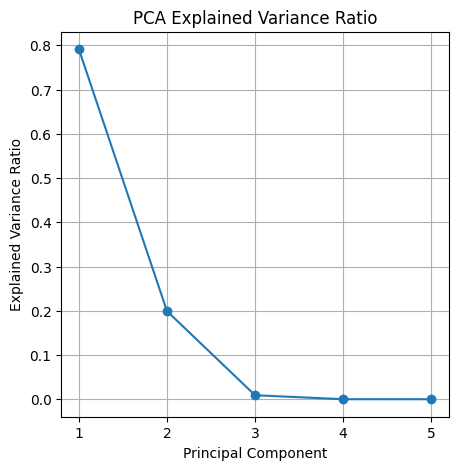

In [11]:
# Define the number of components to keep
n_components = 5

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on the data
X = df.drop("OCCUPANCY_14", axis=1)
pca.fit(X)

# Transform the data
X_pca = pca.transform(X)

# Print PCA eigenvectors
print(f"> PCA eigenvectors (components):")
print(pca.components_)

# print PCA eigenvalues
print(f"\n> PCA eigenvalues:")
print(pca.explained_variance_ratio_)

# Plot PCA explained variance ratio
plt.figure(figsize=(5, 5))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratio")
plt.xticks(range(1, n_components+1))
plt.grid()
plt.show()


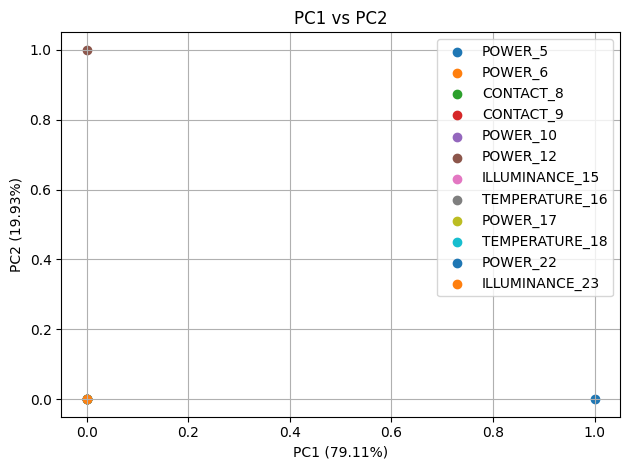

In [22]:
# Plot biplot for PC1 vs PC2

pc1, pc2 = 0, 1
for feature, (x, y) in zip(X.columns, pca.components_[[pc1, pc2]].T):
    plt.scatter(x, y, label=feature)
    # plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.04, fc='r', ec='r')
    # plt.text(x, y, feature, fontsize=10)
plt.xlabel(f"PC{pc1+1} ({pca.explained_variance_ratio_[pc1]*100:.2f}%)")
plt.ylabel(f"PC{pc2+1} ({pca.explained_variance_ratio_[pc2]*100:.2f}%)")
plt.title(f"PC{pc1+1} vs PC{pc2+1}")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()